In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import NearestNDInterpolator

In [2]:
import intake
cat = intake.open_catalog("../catalog.yaml")

In [3]:
run = cat.IFS["tco2559-ng5"]

In [4]:
data = run.ICMGG_atm2d.to_dask()

In [12]:
model_lon = data.lon.values
model_lat = data.lat.values
model_lon = np.where(model_lon>180, model_lon-360, model_lon)

In [13]:
import numpy as np

lon = np.linspace(-30, 60, 90*10)
lat = np.linspace(33, 72, (72-33)*10)
lon2, lat2 = np.meshgrid(lon, lat)

points = np.vstack((model_lon, model_lat)).T
data_sample = data['2t'].isel(time=1)

nn_interpolation = NearestNDInterpolator(points, data_sample.values)
interpolated_nn = nn_interpolation((lon2, lat2))

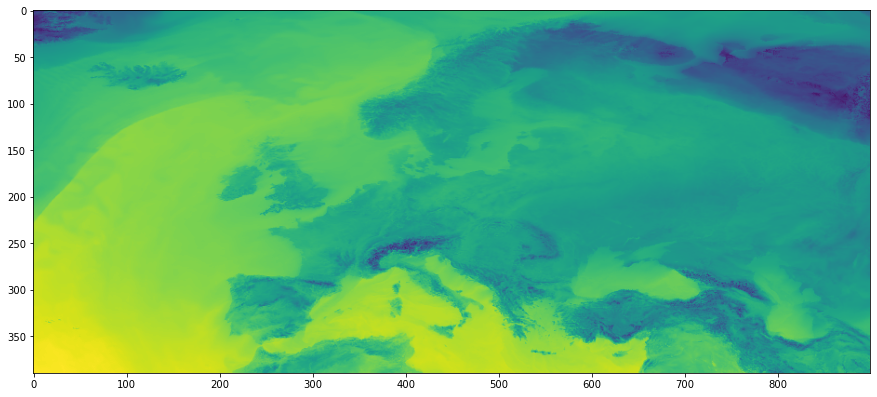

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(np.flipud(interpolated_nn))